#   Instacart Dataset  - Exploration and Analysis

The following questions are designed to explore and understand key aspects of customer behavior, product performance, and transactional patterns within the Instacart dataset. Each question serves a specific business or analytical purpose:

- **3.1**: Understand the composition and structure of the data for appropriate preprocessing and analysis.
- **3.2**: Identify peak hours for customer activity to optimize marketing and logistics.
- **3.3**: Determine the most active days for ordering to inform staffing and inventory planning.
- **3.4**: Measure customer loyalty and behavior based on the number of repeat orders.
- **3.5**: Analyze average basket size to understand customer purchase patterns.
- **3.6**: Discover top-performing products that contribute significantly to sales.
- **3.7**: Examine product-level repeat purchases to gauge product stickiness.
- **3.8**: Identify products that are most likely to be reordered for stock and recommendation optimization.
- **3.9**: Learn which items are prioritized in the cart, indicating essential goods.
- **3.10**: Analyze the effect of time delay between orders on reorder behavior to support retention strategies.
- **3.11**: Understand if long-term customers have stronger reorder tendencies.
- **3.12**: Compare the popularity of organic vs. non-organic products to align with health-conscious trends.
- **3.13**: Investigate whether organic products have higher or lower reorder rates.
- **3.14**: Use visual tools to better interpret the breadth and diversity of product offerings.
- **3.15**: Explore how products are structured by aisle and department to support targeted merchandising.
- **3.16**: Count unique products per category to evaluate product range depth.
- **3.17**: Track sales frequency by category to understand demand dynamics.
- **3.18**: Segment customers who only reorder to better personalize engagement.
- **3.19**: Identify the most habitual customer for insights into loyalty and behavior.
- **3.20**: Leverage historical data to model and predict future purchasing behavior.

These questions form the backbone of the exploratory data analysis (EDA) and guide insights for potential data-driven decision-making.

### 3.1 What is the structure and composition of our datasets?

 
# 1. Imports Libraries

In [1]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from matplotlib.ticker import MultipleLocator
import plotly.express as px
import warnings
from IPython.display import display

# 2. Data Set

In [2]:



# File paths (use raw strings or double backslashes)
base_path = r"E:\Semester 2\Research Proposal\Msc Dissertation\Insta Cart data Set"

# Load CSV files
orders = pd.read_csv(f"{base_path}\\orders.csv")

products = pd.read_csv(f"{base_path}\\products.csv")
order_products = pd.read_csv(f"{base_path}\\order_products__train.csv")
order_products_prior = pd.read_csv(f"{base_path}\\order_products__prior.csv")
aisles = pd.read_csv(f"{base_path}\\aisles.csv")
departments = pd.read_csv(f"{base_path}\\departments.csv")




### 3.1 What is the structure and composition of our datasets?

In [3]:
# Quick preview of the data (similar to head() and glimpse() in R)
print("Orders:")
print(orders.head())

orders.info()

Orders:
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow             

In [4]:
print("\nProducts:")
print(products.head())

products.info()


Products:
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage

In [5]:
print("\nOrder Products Train:")
print(order_products.head())

order_products.info()


Order Products Train:
   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [6]:
print("\nOrder Products Prior:")
print(order_products_prior.head())

order_products_prior.info()



Order Products Prior:
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [7]:
print("\nAisles:")
print(aisles.head())




Aisles:
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [8]:
print("\nDepartments:")
print(departments.head())


Departments:
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [9]:
# Recode / Convert columns in Python using pandas

# Convert `order_hour_of_day` to numeric (should already be, but just in case)
orders['order_hour_of_day'] = pd.to_numeric(orders['order_hour_of_day'], errors='coerce')

# Convert `eval_set` to category
orders['eval_set'] = orders['eval_set'].astype('category')

# Convert product name, aisle, and department to categorical type
products['product_name'] = products['product_name'].astype('category')
aisles['aisle'] = aisles['aisle'].astype('category')
departments['department'] = departments['department'].astype('category')


### 3.2 What times of the day do customers typically place their orders?

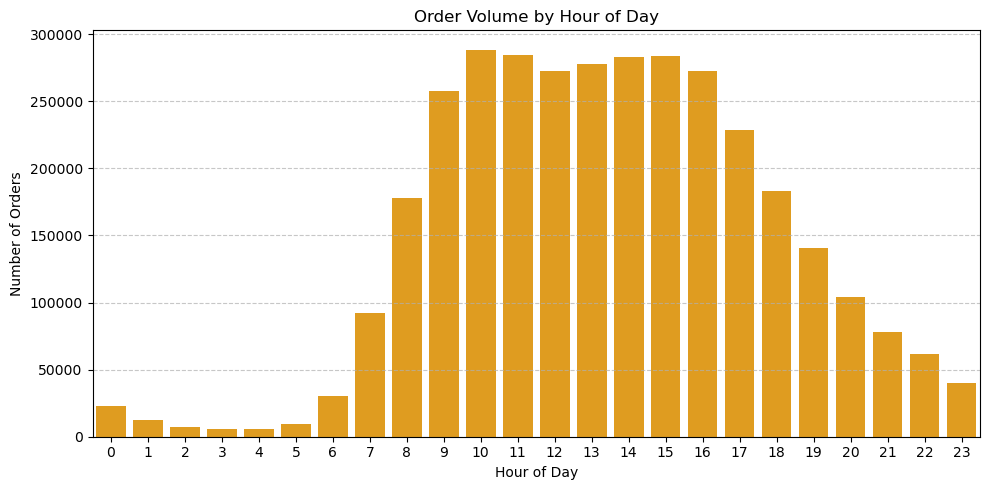

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram of order volume by hour of day
plt.figure(figsize=(10, 5))
sns.countplot(x='order_hour_of_day', data=orders, color='orange')
plt.title('Order Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24))  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 3.3 On which days of the week are orders most frequently placed?

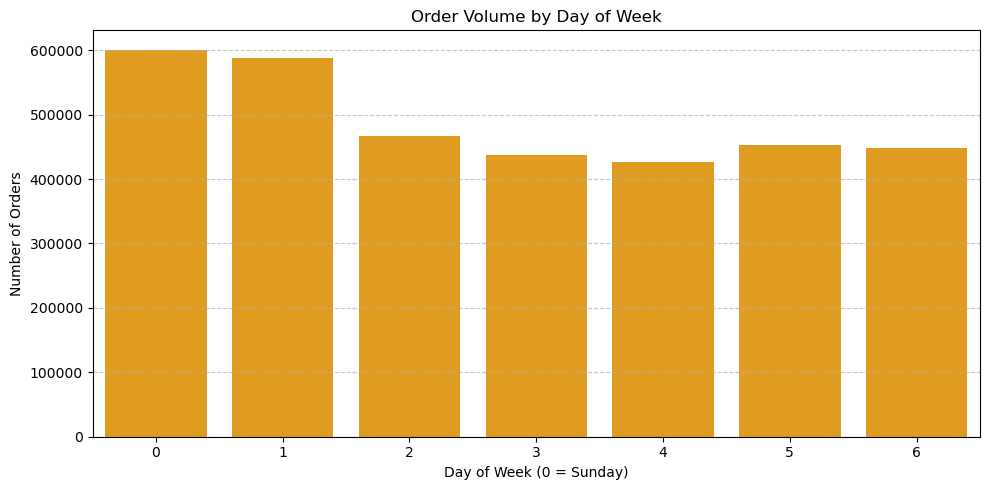

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(x='order_dow', data=orders, color='orange')
plt.title('Order Volume by Day of Week')
plt.xlabel('Day of Week (0 = Sunday)')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 7))  # Days 0 through 6
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### When do they order again?
People seem to order more often after exactly 1 week.

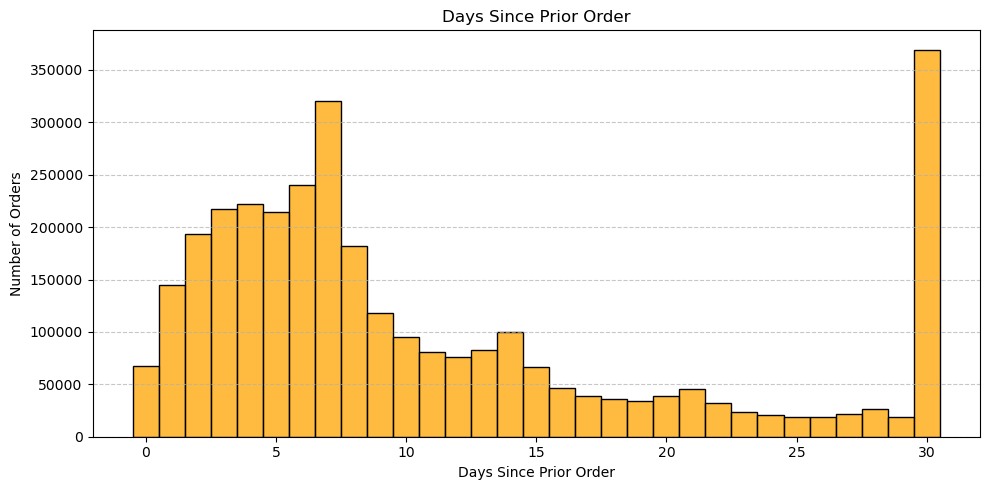

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(data=orders, x='days_since_prior_order', bins=30, color='orange', discrete=True)
plt.title('Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 3.4 How many prior orders has each customer made?

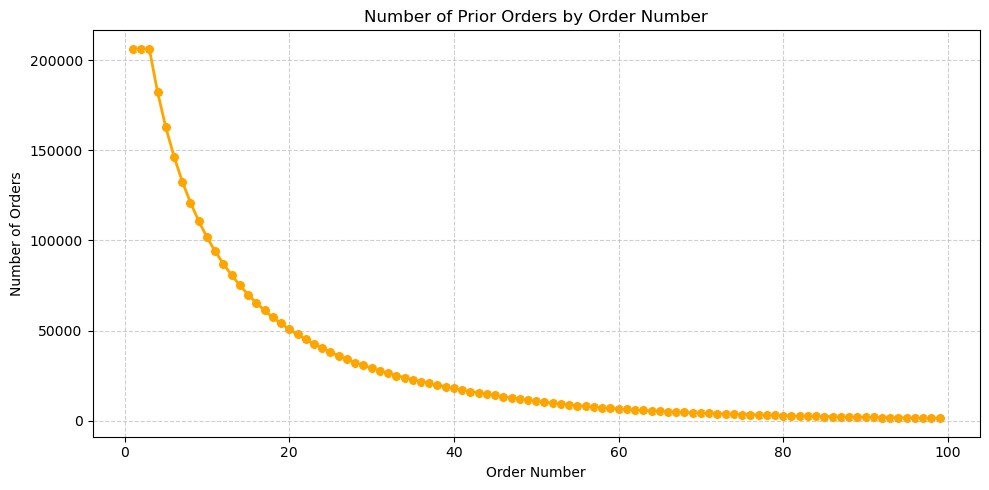

In [13]:
# Filter orders where eval_set is 'prior'
prior_orders = orders[orders['eval_set'] == 'prior']

# Count the frequency of each order_number
order_counts = prior_orders['order_number'].value_counts().sort_index().reset_index()
order_counts.columns = ['order_number', 'n']

# Plot line + points
plt.figure(figsize=(10, 5))
sns.lineplot(data=order_counts, x='order_number', y='n', color='orange', linewidth=2)
sns.scatterplot(data=order_counts, x='order_number', y='n', color='orange', s=50)
plt.title('Number of Prior Orders by Order Number')
plt.xlabel('Order Number')
plt.ylabel('Number of Orders')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 3.5 How many items does a typical order contain?

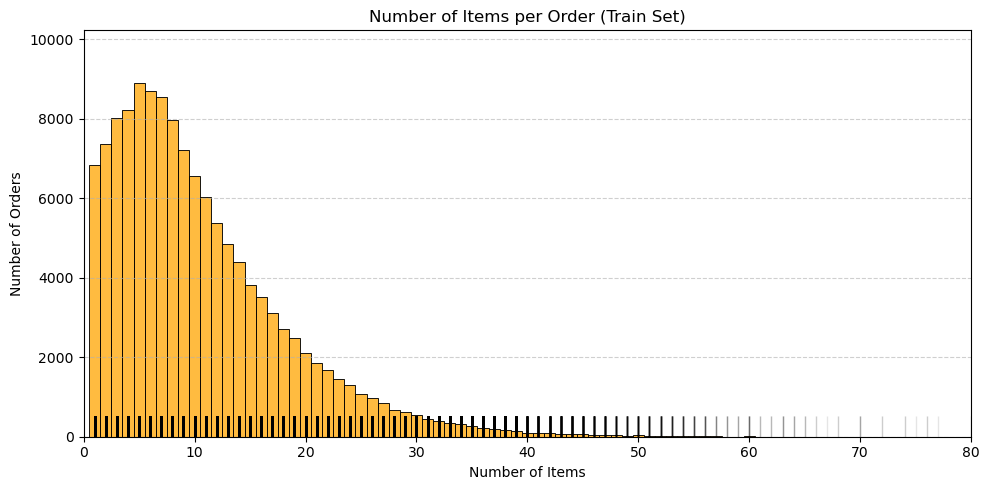

In [14]:
#Train Set

# Group by order_id and get the max add_to_cart_order as the number of items
train_items = order_products.groupby('order_id')['add_to_cart_order'].max().reset_index(name='n_items')

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(train_items['n_items'], bins=80, color='orange', discrete=True)
sns.rugplot(train_items['n_items'], height=0.05, color='black', alpha=0.1)
plt.title('Number of Items per Order (Train Set)')
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.xlim(0, 80)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


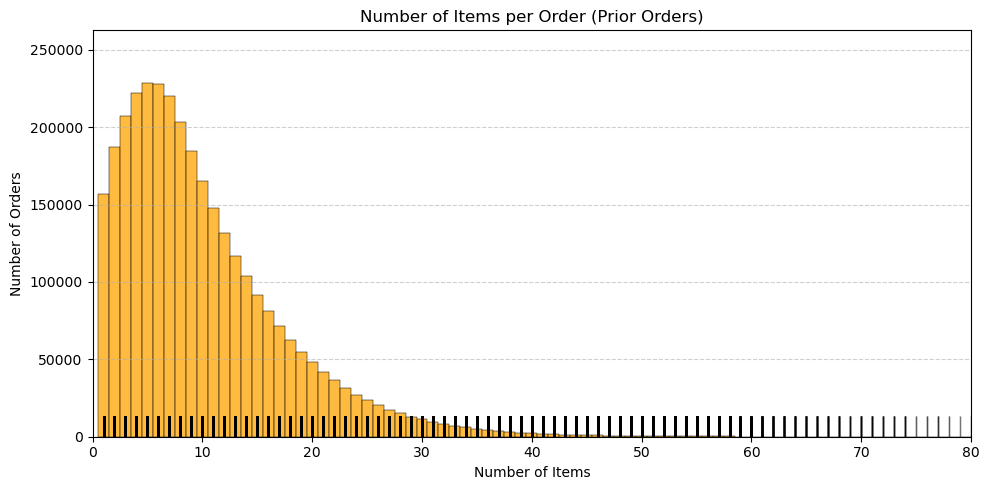

In [15]:
## Prior Orders Set

# Group by order_id and get the max add_to_cart_order
prior_items = order_products_prior.groupby('order_id')['add_to_cart_order'].max().reset_index(name='n_items')

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(prior_items['n_items'], bins=80, color='orange', discrete=True)
sns.rugplot(prior_items['n_items'], height=0.05, color='black', alpha=0.1)
plt.title('Number of Items per Order (Prior Orders)')
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.xlim(0, 80)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 3.6 Which products are the top-selling items overall?

In [16]:

top_products = order_products['product_id'].value_counts().head(15).reset_index()
top_products.columns = ['product_id', 'count']
print("products columns:", products.columns.tolist())
print("top_products columns:", top_products.columns.tolist())
top_products = top_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')

print(top_products[['product_name', 'count']])


products columns: ['product_id', 'product_name', 'aisle_id', 'department_id']
top_products columns: ['product_id', 'count']
              product_name  count
0                   Banana  18726
1   Bag of Organic Bananas  15480
2     Organic Strawberries  10894
3     Organic Baby Spinach   9784
4              Large Lemon   8135
5          Organic Avocado   7409
6     Organic Hass Avocado   7293
7             Strawberries   6494
8                    Limes   6033
9      Organic Raspberries   5546
10     Organic Blueberries   4966
11      Organic Whole Milk   4908
12        Organic Cucumber   4613
13        Organic Zucchini   4589
14    Organic Yellow Onion   4290


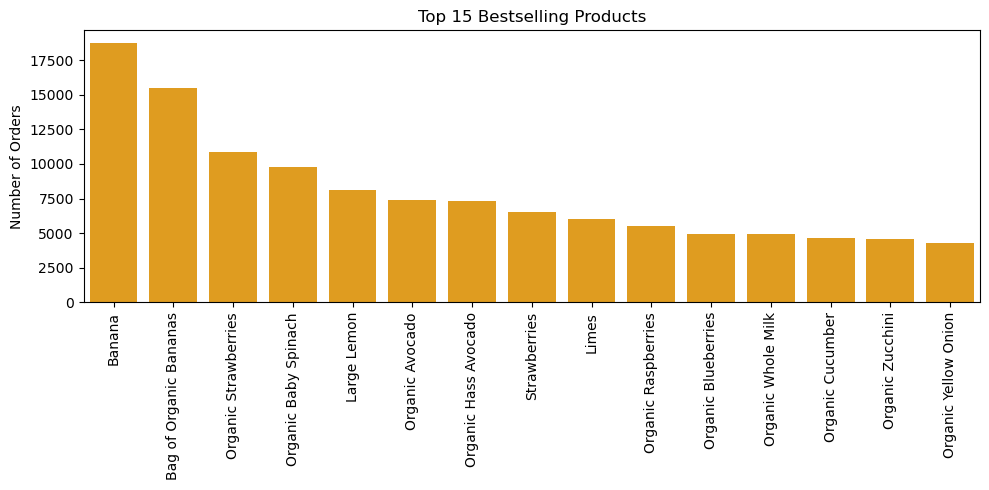

In [17]:

top_products = top_products.sort_values(by='count', ascending=False)

# Optional cleanup: remove any problematic characters from product names
top_products['product_name'] = top_products['product_name'].str.replace(r'[^\x20-\x7E]', '', regex=True)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=top_products, x='product_name', y='count', color='orange')

# Style
plt.title('Top 15 Bestselling Products')
plt.xlabel('')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()

### 3.7 How frequently do customers reorder the same products?

   reordered   count  proportion
0          0  555793    0.401406
1          1  828824    0.598594


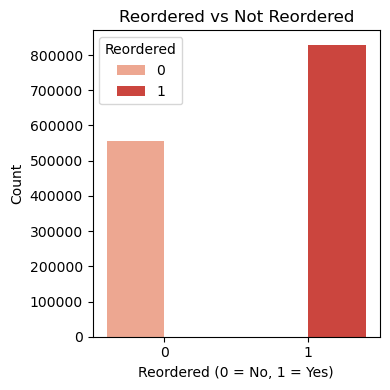

In [18]:

# Step 1: Group by 'reordered' and count
tmp = order_products.groupby('reordered').size().reset_index(name='count')

# Step 2: Calculate proportions
tmp['proportion'] = tmp['count'] / tmp['count'].sum()

# Step 3: Show as table
print(tmp)



# Plot
plt.figure(figsize=(4, 4))
sns.barplot(data=tmp, x='reordered', y='count', hue='reordered', palette='Reds')

plt.title('Reordered vs Not Reordered')
plt.xlabel('Reordered (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Reordered')
plt.tight_layout()
plt.show()



### 3.8 Which products have the highest reorder rates?

In [19]:
# Step 1: Calculate reorder proportion and counts per product
tmp = (
    order_products.groupby('product_id')
    .agg(proportion_reordered=('reordered', 'mean'), n=('reordered', 'count'))
    .reset_index()
)

# Step 2: Filter products with more than 40 orders
tmp = tmp[tmp['n'] > 40]

# Step 3: Select top 15 by reorder proportion
top_reordered = tmp.sort_values(by='proportion_reordered', ascending=False).head(15)

# Step 4: Merge with product names
top_reordered = top_reordered.merge(products[['product_id', 'product_name']], on='product_id')

# Optional: View result
print(top_reordered[['product_name', 'proportion_reordered', 'n']])




                             product_name  proportion_reordered      n
0                    2% Lactose Free Milk              0.934783     92
1                    Organic Low Fat Milk              0.913043    368
2               100% Florida Orange Juice              0.898305     59
3   Original Sparkling Seltzer Water Cans              0.888889     45
4                 Organic Spelt Tortillas              0.888889     81
5                                  Banana              0.884172  18726
6                      Petit Suisse Fruit              0.883333    120
7                  Organic Lowfat 1% Milk              0.881988    483
8     Organic Lactose Free 1% Lowfat Milk              0.881041    269
9                          1% Lowfat Milk              0.878525    461
10                     Double Fiber Bread              0.876543     81
11               Organic Reduced Fat Milk              0.875622   1206
12       100% Lactose Free 1% Lowfat Milk              0.873418     79
13    

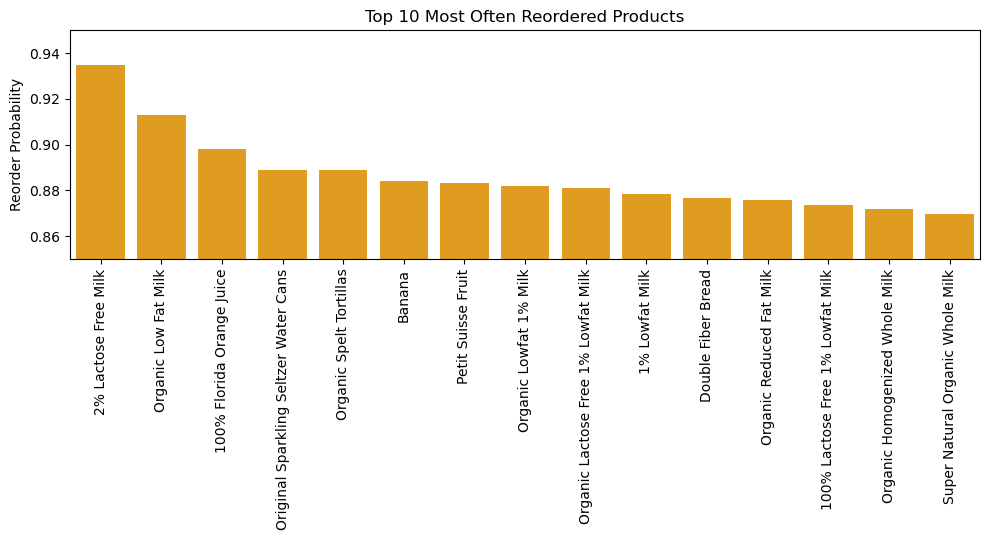

In [20]:
# Clean product names to remove non-printable characters
top_reordered['product_name'] = top_reordered['product_name'].str.replace(r'[^\x20-\x7E]', '', regex=True)

plt.figure(figsize=(10, 5.5))
sns.barplot(
    data=top_reordered.sort_values(by='proportion_reordered', ascending=False),
    x='product_name',
    y='proportion_reordered',
    color='orange'
)

plt.xticks(rotation=90)
plt.ylim(0.85, 0.95)
plt.title('Top 10 Most Often Reordered Products')
plt.xlabel('')
plt.ylabel('Reorder Probability')
plt.tight_layout()
plt.show()


### 3.9 Which products are most commonly added first to the shopping cart?

In [21]:

tmp = (
    order_products
    .groupby(['product_id', 'add_to_cart_order'])
    .size()
    .reset_index(name='count')
)

# Step 2: Calculate percentage of times a product was added at a specific position
# Group by product and calculate the percentage
tmp['pct'] = tmp.groupby('product_id')['count'].transform(lambda x: x / x.sum())

# Step 3: Filter where product was added first and occurred more than 10 times
tmp_first = tmp[(tmp['add_to_cart_order'] == 1) & (tmp['count'] > 10)]

# Step 4: Get top 10 products by pct
top_first = tmp_first.sort_values(by='pct', ascending=False).head(15)

# Step 5: Merge with product names
top_first = top_first.merge(products[['product_id', 'product_name']], on='product_id')

# Optional cleanup of product names
top_first['product_name'] = top_first['product_name'].str.replace(r'[^\x20-\x7E]', '', regex=True)

# View table
print(top_first[['product_name', 'pct', 'count']])


                                       product_name       pct  count
0                            White Multifold Towels  0.661017     39
1                          Sparkling Water, Bottles  0.594203     41
2       Purified Alkalkine Water with Minerals pH10  0.571429     12
3                                Organic Dark Roast  0.560000     14
4                              2% Lactose Free Milk  0.521739     48
5                                       Cookie Tray  0.486111     35
6                       Boneless Pork Shoulder Butt  0.481481     13
7                                    Party Tumblers  0.461538     12
8   Sport Bottle with Flip Cap Natural Spring Water  0.461538     12
9                  XL Pick-A-Size Paper Towel Rolls  0.447619     47
10                               Wastebasket Liners  0.442623     27
11                                    Irish Whiskey  0.440000     11
12                                    Classic Roast  0.431373     22
13                         USDA AA

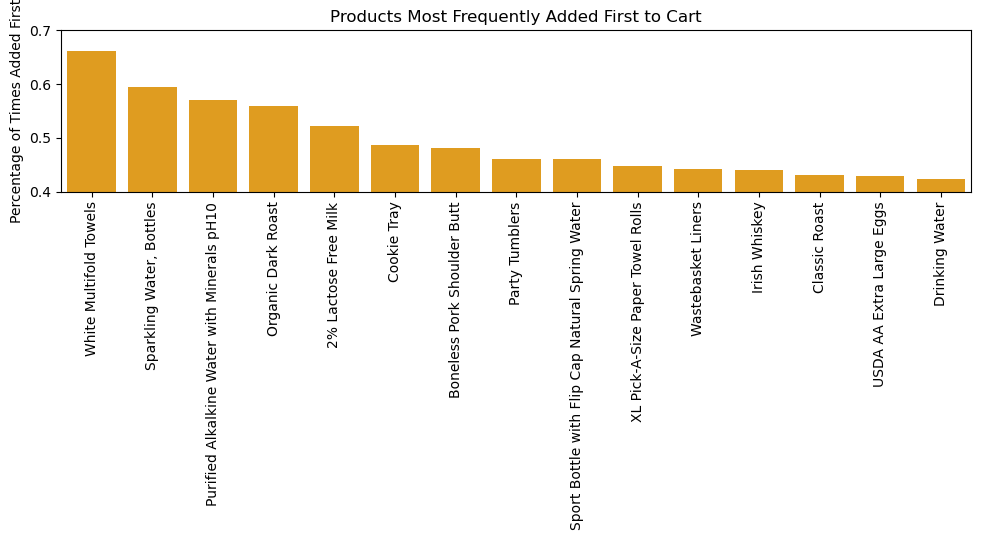

In [22]:
plt.figure(figsize=(10, 5.5))
sns.barplot(
    data=top_first.sort_values(by='pct', ascending=False),
    x='product_name',
    y='pct',
    color='orange'
)

plt.xticks(rotation=90)
plt.ylim(0.4, 0.7)
plt.title('Products Most Frequently Added First to Cart')
plt.xlabel('')
plt.ylabel('Percentage of Times Added First')
plt.tight_layout()
plt.show()


### 3.1 What is the structure and composition of our datasets?

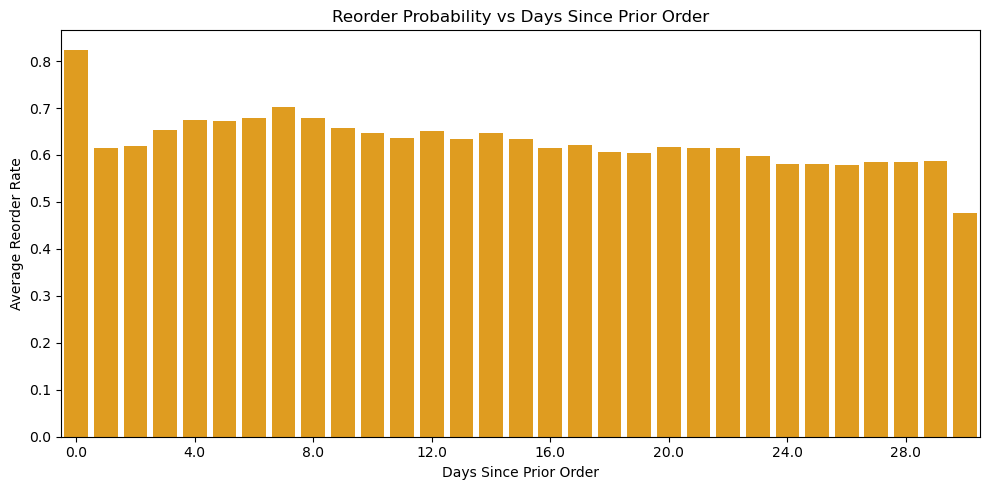

In [23]:
# Step 1: Join order_products with orders on order_id
merged = order_products.merge(orders[['order_id', 'days_since_prior_order']], on='order_id', how='left')

# Step 2: Group by days_since_prior_order and calculate mean reorder rate
reorder_by_days = (
    merged.groupby('days_since_prior_order')['reordered']
    .mean()
    .reset_index(name='mean_reorder')
)
merged = order_products.merge(
    orders[['order_id', 'days_since_prior_order']],
    on='order_id',
    how='inner'
)


# Step 3: Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=reorder_by_days, x='days_since_prior_order', y='mean_reorder', color='orange')

plt.title('Reorder Probability vs Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Average Reorder Rate')

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


### 3.1 What is the structure and composition of our datasets?

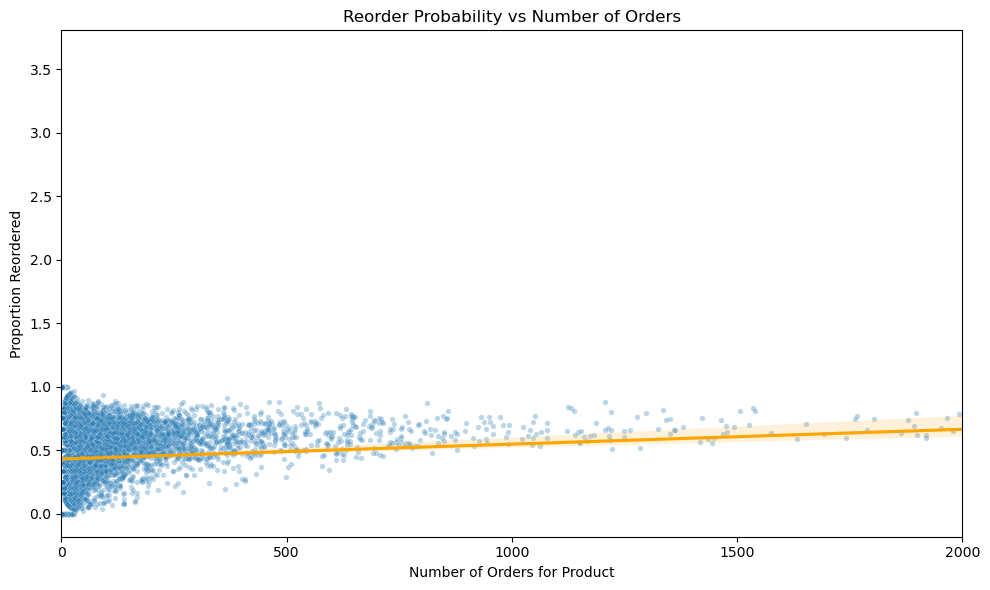

In [24]:

reorder_stats = (
    order_products
    .groupby('product_id')
    .agg(proportion_reordered=('reordered', 'mean'), n=('reordered', 'count'))
    .reset_index()
)


plt.figure(figsize=(10, 6))
sns.scatterplot(data=reorder_stats, x='n', y='proportion_reordered', alpha=0.3, s=15)
sns.regplot(
    data=reorder_stats,
    x='n',
    y='proportion_reordered',
    scatter=False,
    color='orange',
)

plt.title('Reorder Probability vs Number of Orders')
plt.xlabel('Number of Orders for Product')
plt.ylabel('Proportion Reordered')
plt.xlim(0, 2000)
plt.gca().xaxis.set_major_locator(MultipleLocator(500))
plt.tight_layout()
plt.show()




### 3.1 What is the structure and composition of our datasets?

       organic   count  proportion
0  not organic  979000    0.707055
1      organic  405617    0.292945


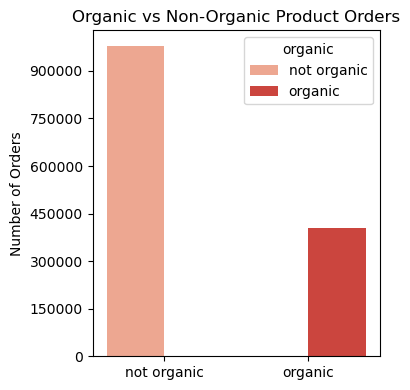

In [25]:
# Flag products containing 'organic' in the name
products['organic'] = products['product_name'].str.lower().str.contains('organic')
products['organic'] = products['organic'].map({True: 'organic', False: 'not organic'})


# Merge product info with order details
merged = order_products.merge(products[['product_id', 'organic']], on='product_id')

# Group by 'organic' and calculate count and proportion
organic_summary = (
    merged.groupby('organic')
    .size()
    .reset_index(name='count')
)

organic_summary['proportion'] = organic_summary['count'] / organic_summary['count'].sum()

# Show the summary table
print(organic_summary)

plt.figure(figsize=(4, 4))
sns.barplot(data=organic_summary, x='organic', y='count', hue='organic', palette='Reds')

plt.title('Organic vs Non-Organic Product Orders')
plt.xlabel('')
plt.ylabel('Number of Orders')
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()


### 3.1 What is the structure and composition of our datasets?

       organic  mean_reordered
0  not organic        0.578498
1      organic        0.647098


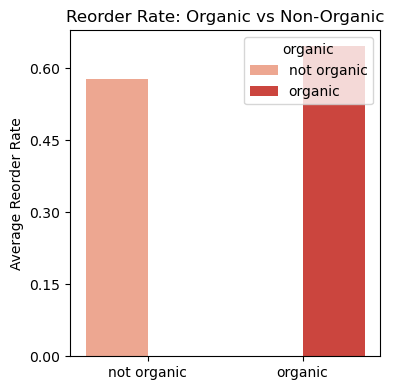

In [26]:
# Ensure 'organic' column is in products
# (skip this if already added earlier)
products['organic'] = products['product_name'].str.lower().str.contains('organic')
products['organic'] = products['organic'].map({True: 'organic', False: 'not organic'})

# Merge with order_products
merged = order_products.merge(products[['product_id', 'organic']], on='product_id')



reorder_rate = (
    merged.groupby('organic')['reordered']
    .mean()
    .reset_index(name='mean_reordered')
)

# Display the table
print(reorder_rate)



plt.figure(figsize=(4, 4))
sns.barplot(data=reorder_rate, x='organic', y='mean_reordered', hue='organic', palette='Reds')

plt.title('Reorder Rate: Organic vs Non-Organic')
plt.xlabel('')
plt.ylabel('Average Reorder Rate')

# Optional: force y-axis to show nice decimal ticks or whole numbers
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=6, integer=True))

plt.tight_layout()
plt.show()

### 3.1 What is the structure and composition of our datasets?

In [27]:


# Step 1: Count number of products per department and aisle
tmp = (
    products
    .groupby(['department_id', 'aisle_id'])
    .size()
    .reset_index(name='n')
    .merge(departments, on='department_id')
    .merge(aisles, on='aisle_id')
)

# Step 2: Count number of times each product was ordered
tmp2 = (
    order_products
    .groupby('product_id')
    .size()
    .reset_index(name='count')
    .merge(products, on='product_id')
    .groupby(['department_id', 'aisle_id'])
    .agg(sumcount=('count', 'sum'))
    .reset_index()
    .merge(tmp, on=['department_id', 'aisle_id'])
)

# Step 3: Add dummy size for optional treemap
tmp2['onesize'] = 1

# View output
print(tmp2.head())




# Temporarily suppress just this warning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message=".*observed=False.*")
    fig = px.treemap(
        tmp2,
        path=['department', 'aisle'],
        values='sumcount',
        color='department',
        title='Product Portfolio: Sales Volume by Department and Aisle'
    )
    fig.show()



   department_id  aisle_id  sumcount     n department  \
0              1        34      3341   229     frozen   
1              1        37     22676  1091     frozen   
2              1        38     18221   880     frozen   
3              1        42      4727   189     frozen   
4              1        52      9729   296     frozen   

                     aisle  onesize  
0      frozen meat seafood        1  
1            ice cream ice        1  
2             frozen meals        1  
3  frozen vegan vegetarian        1  
4         frozen breakfast        1  


### 3.1 What is the structure and composition of our datasets?

In [28]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message=".*observed=False.*")
    
    fig = px.treemap(
        tmp2,
        path=['department', 'aisle'],
        values='onesize',  # Equal size for each tile
        color='department',
        color_discrete_sequence=px.colors.qualitative.Set3,  # Mimic R palette='Set3'
        title='How Aisles Are Organized Within Departments'
    )

fig.show()

### 3.1 What is the structure and composition of our datasets?

In [29]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message=".*observed=False.*")

    fig = px.treemap(
        tmp,  # this is your product count dataframe
        path=['department', 'aisle'],
        values='n',  # Number of products
        color='department',
        color_discrete_sequence=px.colors.qualitative.Set3,
        title='Number of Unique Products per Aisle and Department'
    )

fig.show()

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message=".*observed=False.*")

    fig = px.treemap(
        tmp2,  # dataframe with sumcount per aisle
        path=['department', 'aisle'],
        values='sumcount',
        color='department',
        color_discrete_sequence=px.colors.qualitative.Set3,
        title='Sales Volume by Department and Aisle'
    )

fig.show()


### 3.1 What is the structure and composition of our datasets?

In [30]:
# Step 1: Calculate mean 'reordered' per order
order_means = (
    order_products_prior
    .groupby('order_id')['reordered']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'm', 'count': 'n'})
)

# Step 2: Join with orders having order_number > 2
filtered_orders = orders[orders['order_number'] > 2]
order_means = order_means.merge(filtered_orders, on='order_id', how='right')

# Step 3: Calculate for each user how many of their orders are 100% reordered
tmp2 = (
    order_means[order_means['eval_set'] == 'prior']
    .groupby('user_id')
    .agg(
        n_equal=('m', lambda x: (x == 1).sum()),
        total=('m', 'count')
    )
    .reset_index()
)

# Step 4: Calculate percentage and filter only those who always reorder everything
tmp2['percent_equal'] = tmp2['n_equal'] / tmp2['total']
always_reorder_users = tmp2[tmp2['percent_equal'] == 1].sort_values(by='n_equal', ascending=False)


display(always_reorder_users)


,user_id,n_equal,total,percent_equal
99752,99753,97,97,1.0
106509,106510,49,49,1.0
55330,55331,49,49,1.0
111364,111365,47,47,1.0
74655,74656,46,46,1.0
...,...,...,...,...
112211,112212,1,1,1.0
112155,112156,1,1,1.0
112123,112124,1,1,1.0
112084,112085,1,1,1.0


In [31]:
# Step 1: Get all order_ids for this user from the previous `tmp` DataFrame
user_id = 99753
user_orders = order_means[order_means['user_id'] == user_id]['order_id']

# Step 2: Filter order_products_prior for those orders
user_products = order_products_prior[order_products_prior['order_id'].isin(user_orders)]

# Step 3: Merge with products to get names
user_products = user_products.merge(products, on='product_id', how='left')

# Optional: Drop aisle_id, department_id, organic if they exist
cols_to_drop = [col for col in ['aisle_id', 'department_id', 'organic'] if col in user_products.columns]
user_products = user_products.drop(columns=cols_to_drop)


display(user_products)


,order_id,product_id,add_to_cart_order,reordered,product_name
0,46614,27845,1,1,Organic Whole Milk
1,46614,38689,2,1,Organic Reduced Fat Milk
2,67223,27845,1,1,Organic Whole Milk
3,67223,38689,2,1,Organic Reduced Fat Milk
4,214506,27845,1,1,Organic Whole Milk
...,...,...,...,...,...
182,3309651,27845,2,1,Organic Whole Milk
183,3340933,27845,1,1,Organic Whole Milk
184,3340933,38689,2,1,Organic Reduced Fat Milk
185,3359243,27845,1,1,Organic Whole Milk


### 3.2 What times of the day do customers typically place their orders?

In [32]:
# Step 1: Find the train order for user 99753
user_train_order = orders[(orders['user_id'] == 99753) & (orders['eval_set'] == 'train')]

# Step 2: Get all products from that order
train_order_id = user_train_order.iloc[0]['order_id']
train_order_products = order_products[order_products['order_id'] == train_order_id]

# Step 3: Merge with product details
train_order_products = train_order_products.merge(products, on='product_id', how='left')

# Optional: Drop unnecessary columns
cols_to_drop = [col for col in ['aisle_id', 'department_id', 'organic'] if col in train_order_products.columns]
train_order_products = train_order_products.drop(columns=cols_to_drop)

display(train_order_products)


,order_id,product_id,add_to_cart_order,reordered,product_name
0,3143182,27845,1,1,Organic Whole Milk
1,3143182,38689,2,1,Organic Reduced Fat Milk
